In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# population
N = 1e7
# simuation Time / Day
T = 70

In [3]:
# susceptiable ratio
s = np.zeros([T])
# infective ratio
i = np.zeros([T])
# contact rate
lamda = 0.8

# initial infective people
i[0] = 45.0 / N

for t in range(T-1):
    i[t + 1] = i[t] + i[t] * lamda * (1.0 - i[t])

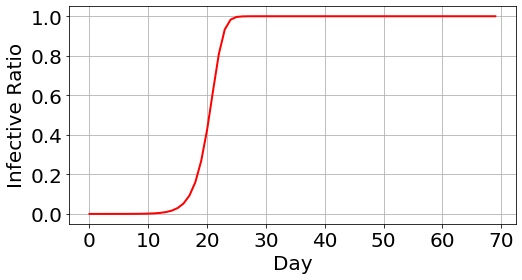

In [20]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(i, c='r', lw=2)
ax.set_xlabel('Day',fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [6]:
a = np.ones([2,3])
a

array([[1., 1., 1.],
       [1., 1., 1.]])

In [7]:
a = np.ones([5])
a

array([1., 1., 1., 1., 1.])

In [ ]:
a = np.zeros([2,3])
a

### Model 1 - SI

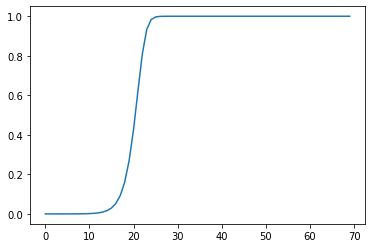

In [78]:
plt.plot(i)

### Model2 - SIS

In [21]:
# susceptiable ratio
s = np.zeros([T])
# infective ratio
i = np.zeros([T])

# contact rate
lamda = 1.0
# recover rate
gamma = 0.5 

# initial infective people
i[0] = 45.0 / N

for t in range(T-1):
    i[t + 1] = i[t] + i[t] * lamda * (1.0 - i[t]) - gamma*i[t]

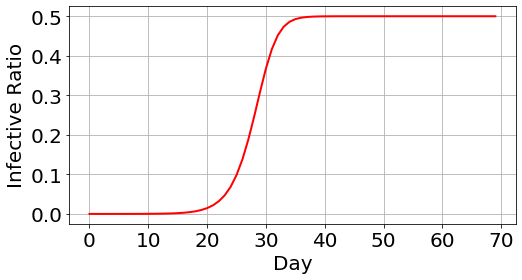

In [23]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(i, c='r', lw=2)
ax.set_xlabel('Day',fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

### Model3 - SIR

In [39]:
# population
N = 1e7 + 10 + 5
# simuation Time / Day
T = 170
# susceptiable ratio
s = np.zeros([T])
# infective ratio
i = np.zeros([T])
# remove ratio
r = np.zeros([T])

# contact rate
lamda = 0.2586
# recover rate
gamma = 0.0821

# initial infective people
i[0] = 10.0 / N
s[0] = 1e7 / N
for t in range(T-1):
    i[t + 1] = i[t] + i[t] * lamda * s[t] - gamma*i[t]
    s[t + 1] = s[t] - lamda * s[t] * i[t]
    r[t + 1] = r[t] + gamma*i[t]

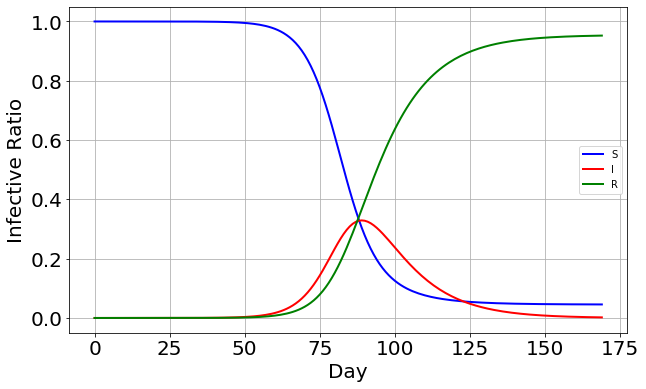

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(s, c='b', lw=2, label='S')
ax.plot(i, c='r', lw=2, label='I')
ax.plot(r, c='g', lw=2, label='R')
ax.set_xlabel('Day',fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend();

### Model4 - SIR with Birth and Death

In [109]:
# susceptiable ratio
s = np.zeros([T])
# infective ratio
i = np.zeros([T])
# removed ratio
r = np.zeros([T])

# birth ratio
b = 20.0 / N
# death ratio
d = 10.0 / N

# contact rate
y = 1.5
# recover rate
u = 0.8 # 1 / infective_period

# sigma = y / u

# initial infective people
i[0] = 45.0 / N
s[0] = 1 - i[0]
for t in range(T-1):
    i[t+1] = i[t] + i[t] * y * s[t] - u*i[t] - d*i[t]
    s[t+1] = s[t] - y * s[t] * i[t] + b - d*s[t]
    r[t+1] = r[t] + u*i[t] - d*r[t]

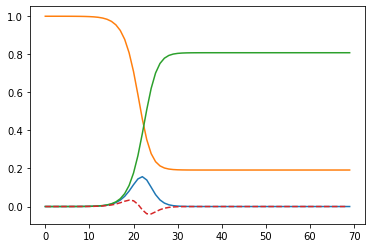

In [111]:
plt.plot(i)
plt.plot(s)
plt.plot(r)
plt.plot(np.diff(i),ls='--')

### Model5 - SEIR

In [52]:
# population
N = 1e7 + 10 + 5
# simuation Time / Day
T = 170
# susceptiable ratio
s = np.zeros([T])
# exposed ratio
e = np.zeros([T])
# infective ratio
i = np.zeros([T])
# remove ratio
r = np.zeros([T])

# contact rate
lamda = 0.5
# recover rate
gamma = 0.0821
# exposed period
sigma = 1 / 4

# initial infective people
i[0] = 10.0 / N
s[0] = 1e7 / N
e[0] = 40.0 / N
for t in range(T-1):
    s[t + 1] = s[t] - lamda * s[t] * i[t]
    e[t + 1] = e[t] + lamda * s[t] * i[t] - sigma * e[t]
    i[t + 1] = i[t] + sigma * e[t] - gamma * i[t]
    r[t + 1] = r[t] + gamma * i[t]

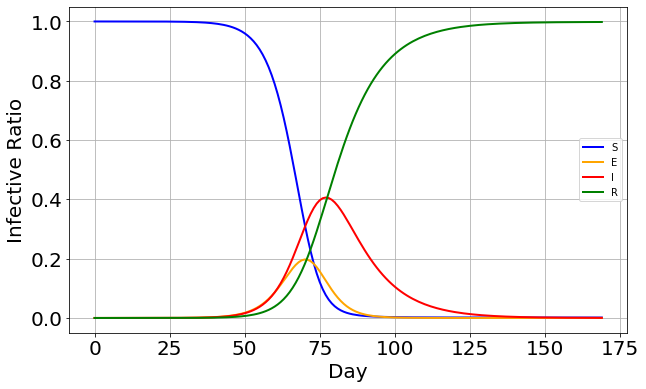

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(s, c='b', lw=2, label='S')
ax.plot(e, c='orange', lw=2, label='E')
ax.plot(i, c='r', lw=2, label='I')
ax.plot(r, c='g', lw=2, label='R')
ax.set_xlabel('Day',fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend();